In [1]:
# Function for generating histogram
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import datetime 
import import_ipynb
import histplot

importing Jupyter notebook from histplot.ipynb
644
3122


In [3]:
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'

In [5]:
Winter18_1 = histplot.getData(17,direct, ASC, 335, 31, 6, float)
Winter18_2 = histplot.getData(18, direct, ASC, 1, 59, 6, float)
Spring18 = histplot.getData(18,direct, ASC, 60, 92,6, float)
Summer18 = histplot.getData(18, direct, ASC, 152, 92, 6 , float)
Fall18 = histplot.getData(18, direct, ASC, 244, 91, 6, float)

In [6]:
Winter18 = np.concatenate([Winter18_1, Winter18_2])


In [7]:
def hist_plots(array,bin_spec, range_tup, xlabel, ylabel, title, color):
    plt.figure(figsize = (10,8))
    plt.hist(array[array != 0], bins = bin_spec, range= range_tup, color = color)
    plt.xlabel(xlabel, fontsize = 14)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(ylabel, fontsize = 14)
    plt.title(title, fontsize = 20)
    #plt.text(1,1, 'Histogram has ' + percent + ' of total precipitation', horizontalalignment = 'center',
            #verticalalignment = 'center')
    #plt.text(0.8,1, eqn,horizontalalignment = 'center',
            #verticalalignment = 'center' )

In [8]:
print(Winter18.shape)
print(Spring18.shape)
print(Summer18.shape)
print(Fall18.shape)
Season18 = np.concatenate([Winter18, Spring18, Summer18, Fall18])

(129600,)
(132476,)
(132477,)
(131036,)


In [9]:
Wprecip, Wnonprecip, Wpreciptotal, Wtotalprep = histplot.preciphist(Winter18, len(Winter18), 5000, 1, 1)
Sp_precip, Sp_nonprecip, Sp_preciptotal, Sp_totalprep = histplot.preciphist(Spring18, len(Spring18), 5000, 1, 1)
Su_precip, Su_nonprecip, Su_preciptotal, Su_totalprep = histplot.preciphist(Summer18, len(Summer18), 5000, 1, 1)
Fprecip, Fnonprecip, Fpreciptotal, Ftotalprep = histplot.preciphist(Fall18, len(Fall18), 5000, 1, 1)

In [10]:
precip18, nonprecip18, preciptotal18, totalprep18 = histplot.preciphist(Season18, len(Season18), 20000, 1, 1)
countAll = 0
for i in range(0,20000):
    hold = precip18[i]
    if hold > 0:
        countAll += 1
perc = np.zeros(50)
for i in range(0, 50):
    perc[i] =np.percentile(precip18[:countAll], i*2)
print(perc)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.
  2.  3.  3.  3.  4.  5.  5.  6.  7.  9. 11. 16. 22. 38.]


In [11]:
count = 0
count1 = 0
count2 = 0
count3 = 0
for i in range(0,5000):
    hold = Wprecip[i]
    hold1 = Sp_precip[i]
    hold2 = Su_precip[i]
    hold3 = Fprecip[i]
    if hold > 0:
        count += 1
    if hold1 > 0:
        count1 += 1
    if hold2 > 0:
        count2 += 1
    if hold3 > 0:
        count3 += 1
print(count)
print(count1)
print(count2)
print(count3)

1028
943
684
1046


In [12]:
Wprecip = Wprecip[:count]
Sp_precip = Sp_precip[:count1]
Su_precip = Su_precip[:count2]
Fprecip = Fprecip[:count3]

In [15]:
one_bin = np.array([2, 3, 4, 5, 6, 7, 9, 11, 16, 22, 38])
hist18, bin_edge = np.histogram(precip18, bins = one_bin)

In [18]:
log_x = np.log(one_bin)
log_y = np.log(hist18)
log_x_2 = np.log(bin_edge[:12])
bin_val = np.zeros(10)
for i in range(0, 10):
    bin_val[i] = (one_bin[i]+one_bin[i+1])/2
print(bin_val)
logx = np.log(bin_val)
print(log_y)
curve_fit = np.polyfit(logx, log_y, 1)
print(curve_fit)

[ 2.5  3.5  4.5  5.5  6.5  8.  10.  13.5 19.  30. ]
[6.06610809 5.42495002 4.90527478 4.74493213 4.24849524 4.61512052
 4.26267988 4.48863637 4.31748811 4.36944785]
[-0.59569002  5.97024539]


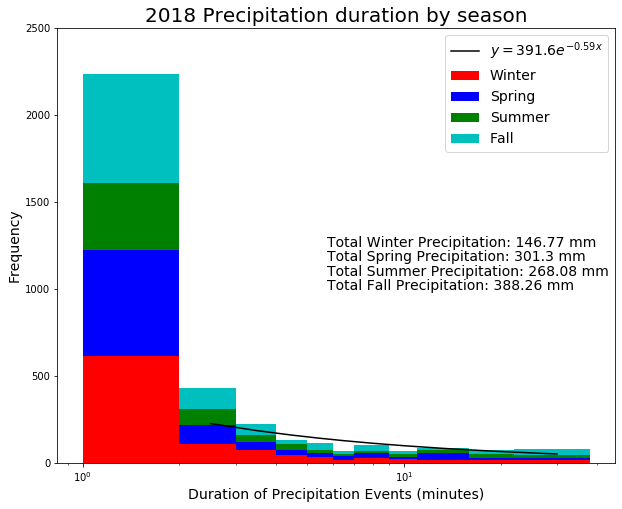

In [23]:
plt.figure(figsize = (10,8))
plt.hist([Wprecip, Sp_precip, Su_precip,Fprecip], bins =perc, range= (perc.min,perc.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 14)
plt.xscale('log')
plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 14)
plt.title('2018 Precipitation duration by season', fontsize = 20)
plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
plt.figtext(0.5, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep,2)) + ' mm', fontsize = 14)
plt.figtext(0.5, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep,2)) + ' mm', fontsize = 14)
plt.plot(bin_val, test*y, color = 'k' )
plt.legend(labels = ['$y = 391.6 e^{-0.59x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

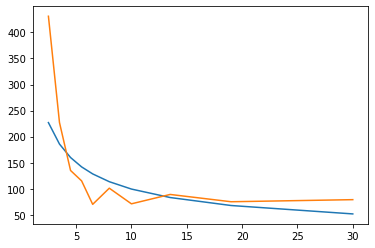

In [19]:
test = np.exp(curve_fit[1])
y = np.exp(curve_fit[0]*logx)
plt.plot(bin_val, test*y)
plt.plot(bin_val, hist19)

In [26]:
Summer17 = histplot.getData(18, direct, ASC, 197, 47, 6 , float)
Fall17 = histplot.getData(18, direct, ASC, 244, 91, 6, float)

In [27]:
Season17 = np.concatenate([Summer17, Fall17])

In [28]:
Su_precip17, Su_nonprecip17, Su_preciptotal17, Su_totalprep17 = histplot.preciphist(Summer17, len(Summer17), 5000, 1, 1)
Fprecip17, Fnonprecip17, Fpreciptotal17, Ftotalprep17 = histplot.preciphist(Fall17, len(Fall17), 5000, 1, 1)

In [29]:
precip17, nonprecip17, preciptotal17, totalprep17 = histplot.preciphist(Season17, len(Season17), 20000, 1, 1)
countAll = 0
for i in range(0,20000):
    hold = precip17[i]
    if hold > 0:
        countAll += 1
perc = np.zeros(50)
for i in range(0, 50):
    perc[i] =np.percentile(precip17[:countAll], i*2)
print(perc)

[ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    2.    2.    2.    2.    2.    2.
  3.    3.    3.    4.    4.    5.    5.    7.    8.   10.   14.   19.
 27.   39.36]


In [30]:
count = 0
count1 = 0
for i in range(0,5000):
    hold2 = Su_precip17[i]
    hold3 = Fprecip17[i]
    if hold2 > 0:
        count += 1
    if hold3 > 0:
        count1 += 1
print(count)
print(count1)

396
1046


In [35]:
one_bin = np.array([2, 3, 4, 5, 7, 8, 10, 14, 19, 27, 39])
hist17, bin_edge = np.histogram(precip17, bins = one_bin)

In [36]:
log_x = np.log(one_bin)
log_y = np.log(hist17)
log_x_2 = np.log(bin_edge[:12])
bin_val = np.zeros(10)
for i in range(0, 10):
    bin_val[i] = (one_bin[i]+one_bin[i+1])/2
print(bin_val)
logx = np.log(bin_val)
print(log_y)
curve_fit = np.polyfit(logx, log_y, 1)
print(curve_fit)

[ 2.5  3.5  4.5  6.   7.5  9.  12.  16.5 23.  33. ]
[5.20400669 4.51085951 3.8918203  4.35670883 2.99573227 3.4657359
 3.4339872  3.4339872  3.29583687 3.49650756]
[-0.61199954  5.13027119]


In [38]:
test = np.exp(curve_fit[1])
y = np.exp(curve_fit[0]*logx)

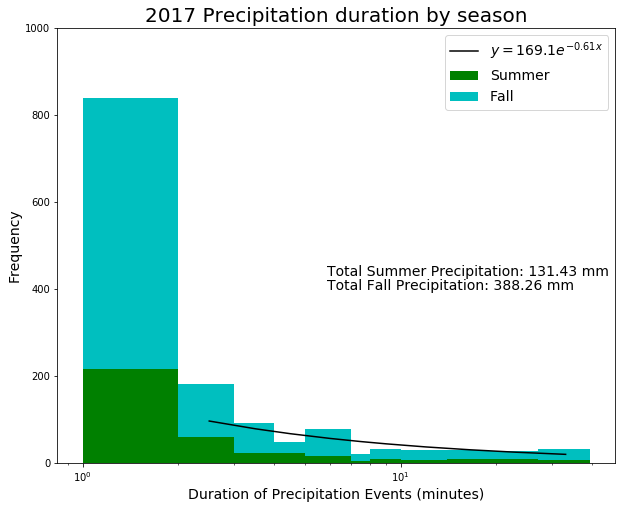

In [42]:
plt.figure(figsize = (10,8))
plt.hist([ Su_precip17,Fprecip17], bins =perc, range= (perc.min,perc.max), color = ['g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 14)
plt.xscale('log')
plt.ylim(0,1000)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 14)
plt.title('2017 Precipitation duration by season', fontsize = 20)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
plt.figtext(0.5, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17,2)) + ' mm', fontsize = 14)
plt.figtext(0.5, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17,2)) + ' mm', fontsize = 14)
plt.plot(bin_val, test*y, color = 'k' )
plt.legend(labels = ['$y = 169.1 e^{-0.61x}$', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [41]:
print(test)

169.06296044233164


In [48]:
Winter20_1 = histplot.getData(19,direct, ASC, 335, 31, 6, float)
Winter20_2 = histplot.getData(20, direct, ASC, 1, 60, 6, float)
Spring20 = histplot.getData(20,direct, ASC, 61, 92,6, float)
Summer20 = histplot.getData(20, direct, ASC, 153, 92, 6 , float)
Fall20 = histplot.getData(20, direct, ASC, 245, 69, 6, float)

In [49]:
Winter20 = np.concatenate([Winter20_1, Winter20_2])


In [50]:
print(Winter20.shape)
print(Spring20.shape)
print(Summer20.shape)
print(Fall20.shape)
Season20 = np.concatenate([Winter20, Spring20, Summer20, Fall20])

(131040,)
(132476,)
(132464,)
(99356,)


In [51]:
Wprecip20, Wnonprecip20, Wpreciptotal20, Wtotalprep20 = histplot.preciphist(Winter20, len(Winter20), 5000, 1, 1)
Sp_precip20, Sp_nonprecip20, Sp_preciptotal20, Sp_totalprep20 = histplot.preciphist(Spring20, len(Spring20), 5000, 1, 1)
Su_precip20, Su_nonprecip20, Su_preciptotal20, Su_totalprep20 = histplot.preciphist(Summer20, len(Summer20), 5000, 1, 1)
Fprecip20, Fnonprecip20, Fpreciptotal20, Ftotalprep20 = histplot.preciphist(Fall20, len(Fall20), 5000, 1, 1)

In [53]:
precip20, nonprecip20, preciptotal20, totalprep20 = histplot.preciphist(Season20, len(Season20), 20000, 1, 1)
countAll = 0
for i in range(0,20000):
    hold = precip20[i]
    if hold > 0:
        countAll += 1
perc = np.zeros(50)
for i in range(0, 50):
    perc[i] =np.percentile(precip20[:countAll], i*2)
print(perc)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.
  2.  3.  3.  3.  4.  4.  5.  6.  6.  8. 10. 13. 19. 42.]


In [54]:
count = 0
count1 = 0
count2 = 0
count3 = 0
for i in range(0,5000):
    hold = Wprecip20[i]
    hold1 = Sp_precip20[i]
    hold2 = Su_precip20[i]
    hold3 = Fprecip20[i]
    if hold > 0:
        count += 1
    if hold1 > 0:
        count1 += 1
    if hold2 > 0:
        count2 += 1
    if hold3 > 0:
        count3 += 1
print(count)
print(count1)
print(count2)
print(count3)

1254
1000
469
454


In [55]:
Wprecip20 = Wprecip20[:count]
Sp_precip20 = Sp_precip20[:count1]
Su_precip20 = Su_precip20[:count2]
Fprecip20 = Fprecip20[:count3]

In [56]:
one_bin = np.array([2, 3, 4, 5, 6, 8, 10, 13, 19, 42])
hist20, bin_edge = np.histogram(precip20, bins = one_bin)

In [59]:
log_x = np.log(one_bin)
log_y = np.log(hist20)
log_x_2 = np.log(bin_edge[:12])
bin_val = np.zeros(9)
for i in range(0, 9):
    bin_val[i] = (one_bin[i]+one_bin[i+1])/2
print(bin_val)
logx = np.log(bin_val)
print(log_y)
curve_fit = np.polyfit(logx, log_y, 1)
print(curve_fit)

[ 2.5  3.5  4.5  5.5  7.   9.  11.5 16.  30.5]
[5.99146455 5.27811466 4.91265489 4.47733681 4.7095302  4.06044301
 4.39444915 4.18965474 4.21950771]
[-0.65356464  6.01086185]


In [61]:
test = np.exp(curve_fit[1])
y = np.exp(curve_fit[0]*logx)
print(test)
print(y)

407.83465988553667
[0.54944026 0.44097743 0.37418244 0.32818984 0.28033273 0.23787064
 0.20265877 0.16331639 0.10713074]


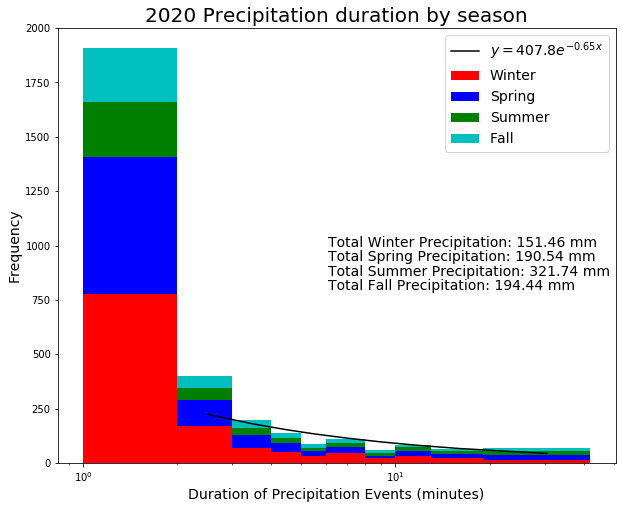

In [63]:
plt.figure(figsize = (10,8))
plt.hist([Wprecip20, Sp_precip20, Su_precip20,Fprecip20], bins =perc, range= (perc.min,perc.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 14)
plt.xscale('log')
plt.ylim(0,2000)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 14)
plt.title('2020 Precipitation duration by season', fontsize = 20)
plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep20,2)) + ' mm', fontsize = 14)
plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep20,2)) + ' mm', fontsize = 14)
plt.figtext(0.5, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep20,2)) + ' mm', fontsize = 14)
plt.figtext(0.5, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep20,2)) + ' mm', fontsize = 14)
plt.plot(bin_val, test*y, color = 'k' )
plt.legend(labels = ['$y = 407.8 e^{-0.65x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )